In [1]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd())) # Include ../SSD in path
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
import dataset_exploration.analyze_stuff as analyze
from vizer.draw import draw_boxes
from tops.config import instantiate, LazyConfig
from ssd import utils
#import configs.retinaNet_focal_loss as config
np.random.seed(0)

In [3]:

basepath = '/work/alexaram/project_tdt4265/assignment4/SSD/data/tdt4265_2022/train_annotations.json'
df = pd.read_json(basepath,lines = True)
#print(df.to_string()) 

2022-04-30 13:23:01,135 [INFO ] NumExpr defaulting to 8 threads.


Saving SSD outputs to: outputs/

 bbox information x and y
                  x            y             h             w
count  18287.000000  18287.00000  18287.000000  18287.000000
mean     430.433772     78.32047     27.330150     10.179160
std      153.689354      5.46580      8.272302      6.593516
min      187.570000     64.18000     14.720000      6.460000
25%      351.260000     76.38000     18.800000      6.460000
50%      351.260000     81.08000     31.320000      7.940000
75%      477.590000     81.08000     31.320000      7.940000
max      937.900000     87.54000     46.220000     32.000000
median:  
 x    351.26
y     81.08
h     31.32
w      7.94
dtype: float64
classes ocourens :  
 1    9563
7    4910
8    1588
5    1043
6     615
3     445
2     123
Name: category_id, dtype: int64
area mean:  786.1964524799037 area median:  261.1161000000001


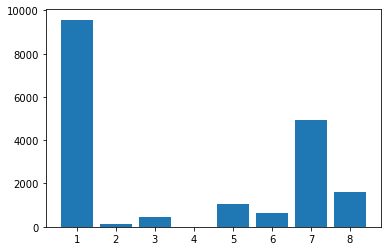

In [146]:
BATCH_SIZE = 1
SET_TYPE = 'train'
CFG_PATH = 'configs/retinaNet_focal_loss.py'

cfg = analyze.get_config(CFG_PATH)
#print(cfg)
metadata = analyze.load_annotation_file(cfg, SET_TYPE)
#number of times a value appears = (df['image_id']==1).sum()
# occourence_classes = df['category_id'].value_counts()
annotations = metadata['annotations']
df = pd.DataFrame(data=annotations)


df_categorys = df.loc[df['category_id']]
hight = []
width = []
x = []
y = []
# 
for i in range(len(df_categorys)):
     list = df_categorys['bbox'].values[i]
     x.append(list[0])
     y.append(list[1])
     hight.append(list[3])
     width.append(list[2])
dict = {'x':x,'y':y,'h':hight,'w':width}
dict_hw = {'hight':hight,'width':width}  
df_bbox = pd.DataFrame(dict)  

print('\n','bbox information x and y')
bbox_description = df_bbox.describe()
bbox_median = df_bbox.median()
print(bbox_description)
print('median: ','\n',bbox_median)


occourence_classes = df['category_id'].value_counts()
print('classes ocourens : ','\n' ,occourence_classes)
number_of_images = len(df)
plt.bar(occourence_classes.index,occourence_classes.values)

area_mean = df['area'].mean()
area_median = df['area'].median()
area_description = df['area'].describe()
print('area mean: ',area_mean, 'area median: ', area_median)




In [148]:
# CARS
BATCH_SIZE = 1
SET_TYPE = 'train'
CFG_PATH = 'configs/retinaNet_focal_loss.py'

cfg = analyze.get_config(CFG_PATH)
#print(cfg)
metadata = analyze.load_annotation_file(cfg, SET_TYPE)
#number of times a value appears = (df['image_id']==1).sum()
# occourence_classes = df['category_id'].value_counts()
annotations = metadata['annotations']
df = pd.DataFrame(data=annotations)
df


Saving SSD outputs to: outputs/


,bbox,area,category_id,image_id,id,segmentation,iscrowd
0,"[725.93, 63.64, 20.40000000000009, 13.73999999...",280.2960,1,1,1,[],0
1,"[351.26, 81.08, 7.939999999999998, 31.32000000...",248.6808,7,1,2,[],0
2,"[187.57, 81.25, 7.27000000000001, 23.61]",171.6447,6,1,3,[],0
3,"[431.3, 87.54, 7.279999999999973, 19.839999999...",144.4352,6,1,4,[],0
4,"[107.8, 78.1, 37.3, 39.0]",1454.7000,1,1,5,[],0
...,...,...,...,...,...,...,...
18282,"[523.03, 72.26, 16.06000000000006, 13.50999999...",216.9706,1,1603,18283,[],0
18283,"[461.68, 63.35, 4.5400000000000205, 11.46]",52.0284,8,1603,18284,[],0
18284,"[710.64, 82.7, 13.289999999999964, 45.3]",602.0370,7,1604,18285,[],0
18285,"[527.9, 72.7, 16.06000000000006, 13.5099999999...",216.9706,1,1604,18286,[],0


Saving SSD outputs to: outputs/


2022-05-02 18:03:01,253 [WARNI] posx and posy should be finite values
2022-05-02 18:03:01,313 [WARNI] posx and posy should be finite values


________________________ car ________________________
count     9563.000000
mean       996.867675
std       1586.448424
min          9.990000
25%        189.857500
50%        411.817400
75%       1281.372400
max      32424.309000
Name: area, dtype: float64
________________________ truck ________________________
count      123.000000
mean      5743.523333
std      11132.194001
min        156.853900
25%        301.686600
50%        714.950000
75%       3792.810700
max      45145.170000
Name: area, dtype: float64
________________________ bus ________________________
count      445.000000
mean      4419.783734
std      10217.193288
min         21.735200
25%        120.980000
50%        265.325400
75%       1032.712300
max      51046.400000
Name: area, dtype: float64
________________________ MC ________________________
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: area, dtype: float64
________________________ bicycle __________

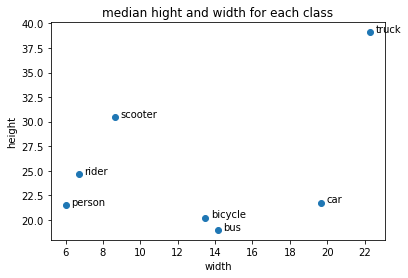

2022-05-02 18:03:01,357 [WARNI] posx and posy should be finite values
2022-05-02 18:03:01,410 [WARNI] posx and posy should be finite values


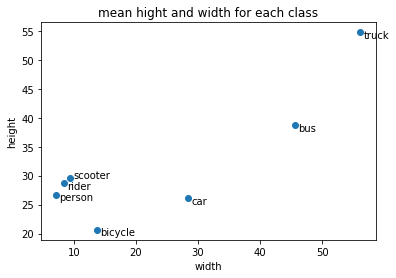

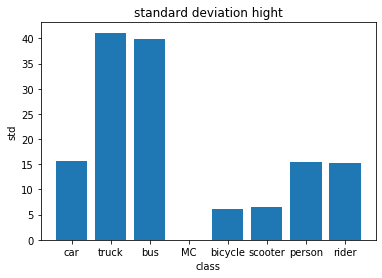

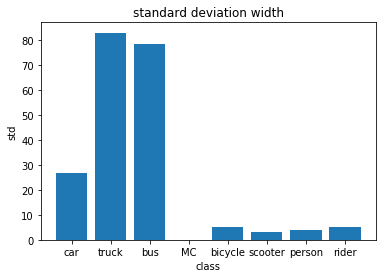

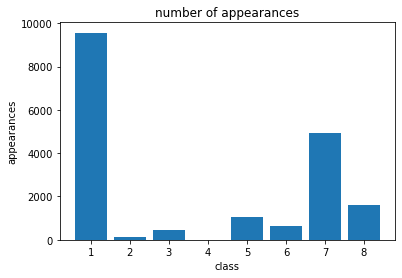

In [150]:
BATCH_SIZE = 1
SET_TYPE = 'train'
CFG_PATH = 'configs/retinaNet_focal_loss.py'

cfg = analyze.get_config(CFG_PATH)
#print(cfg)
metadata = analyze.load_annotation_file(cfg, SET_TYPE)
#number of times a value appears = (df['image_id']==1).sum()
# occourence_classes = df['category_id'].value_counts()
annotations = metadata['annotations']
df = pd.DataFrame(data=annotations)


class_dict = {"car":[], "truck":[], "bus":[], "MC":[], "bicycle":[], "scooter":[], "person":[], "rider":[]}
class_names = ("car", "truck", "bus", "MC", "bicycle", "scooter", "person", "rider")
hights_median = []
widths_median = []
hights_mean = []
widths_mean = []
hights_std = []
widths_std = []
areas = []
for i,class_name in enumerate(class_names):
     
     
     df_class = df.loc[df['category_id']==i+1]
     hight = []
     width = []
     x = []
     y = []
     for j in range(len(df_class)):
          list = df_class['bbox'].values[j]
          x.append(list[0])
          y.append(list[1])          
          width.append(list[2])
          hight.append(list[3])
     dict = {'x':x,'y':y,'hight':hight,'width':width}
     df_bbox = pd.DataFrame(dict)      
     bbox_description = df_bbox.describe()
     # print('________________________',class_name,'________________________')
     # print(bbox_description) # uncomment to see the entire description for each class
     hights_median.append(bbox_description['hight']['50%'])
     widths_median.append(bbox_description['width']['50%'])
     hights_mean.append(bbox_description['hight']['mean'])
     widths_mean.append(bbox_description['width']['mean'])
     hights_std.append(bbox_description['hight']['std'])
     widths_std.append(bbox_description['width']['std'])
     

for i,class_name in enumerate(class_names):     
     print('________________________',class_name,'________________________')
     df_class = df.loc[df['category_id']==i+1]        
     area_description = df_class['area'].describe()
     print(area_description)
     #areas.append(area_description)


plt.scatter(widths_median,hights_median)
plt.xlabel('width')
plt.ylabel('height')
plt.title('median hight and width for each class')
for i,txt in enumerate(class_names):
     plt.text(widths_median[i]+0.3,hights_median[i],txt)
plt.show()



plt.scatter(widths_mean,hights_mean)


plt.xlabel('width')
plt.ylabel('height')
plt.title('mean hight and width for each class')
for i,txt in enumerate(class_names):
     if txt != 'scooter':
          plt.text(widths_mean[i]+0.5,hights_mean[i]-1,txt)
     else:
          plt.text(widths_mean[i]+0.5,hights_mean[i],txt)
plt.show()

plt.bar(class_names,hights_std)
plt.xlabel('class')
plt.ylabel('std')
plt.title('standard deviation hight')
plt.show()

plt.bar(class_names,widths_std)
plt.xlabel('class')
plt.ylabel('std')
plt.title('standard deviation width')
plt.show()

occourence_classes = df['category_id'].value_counts()
plt.bar(occourence_classes.index,occourence_classes.values)
plt.xlabel('class')
plt.ylabel('appearances')
plt.title('number of appearances')
plt.show()